In [1]:
# funkcija za iskanje ustreznih grafov
########################################################
# POMOŽNE FUNKCIJE
########################################################

def is_strong_odd_IS(G, S):
    """
    Preveri, ali je S strong odd independent set v G
    """
    # neodvisnost
    for u in S:
        for v in S:
            if u != v and G.has_edge(u, v):
                return False

    # liha velikost
    if len(S) % 2 == 0:
        return False

    # strong odd pogoj
    for v in G.vertices():
        if v not in S:
            cnt = sum(1 for u in S if G.has_edge(u, v))
            if cnt % 2 == 0:
                return False

    return True


def all_neighborhoods(G): # preveri za vsak v
    return [set(G.neighbors(v)) for v in G.vertices()]


########################################################
# PREVERJANJE POGOJA (i)
########################################################

def satisfies_i(G):
    if not G.is_connected():
        return False
    
    if G.diameter() > 3: # premer mora biti <=
    return False

    if G.girth() < 4:   # triangle-free (dolžina najdaljšega cikla)
        return False

    r = G.degree(G.vertices()[0])
    if r % 2 == 0:
        return False

    for v in G.vertices():
        Nv = set(G.neighbors(v))

        # mora biti neodvisna
        for x in Nv:
            for y in Nv:
                if x != y and G.has_edge(x, y):
                    return False

        # mora biti strong odd IS
        if not is_strong_odd_IS(G, Nv):
            return False

        # KLJUČNO: mora biti maksimalna
        for u in G.vertices():
            if u not in Nv:
                if is_strong_odd_IS(G, Nv | {u}):
                    return False

    return True

########################################################
# GLAVNI ISKALNI DEL
########################################################

def search_for_i(graph_list):
    good = []
    for G in graph_list:
        if satisfies_i(G):
            good.append(G)
    return good



IndentationError: expected an indented block after 'if' statement on line 42 (2402417606.py, line 43)

In [45]:
# r = 3
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_i3 = {}
r = 3

for n in range(4, 19, 2):
    print(f"\nIščem grafe za (i): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_i(G):
            sols.append(G)

    solutions_i3[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (i): {len(sols)}")




Iščem grafe za (i): n = 4
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 6
  preverjenih grafov: 1
  najdenih rešitev za (i): 1

Iščem grafe za (i): n = 8
  preverjenih grafov: 2
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 10
  preverjenih grafov: 6
  najdenih rešitev za (i): 1

Iščem grafe za (i): n = 12
  preverjenih grafov: 23
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 14


  preverjenih grafov: 112
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 16


  preverjenih grafov: 801
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 18


  preverjenih grafov: 7840
  najdenih rešitev za (i): 0


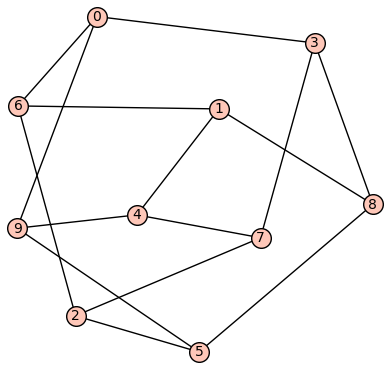

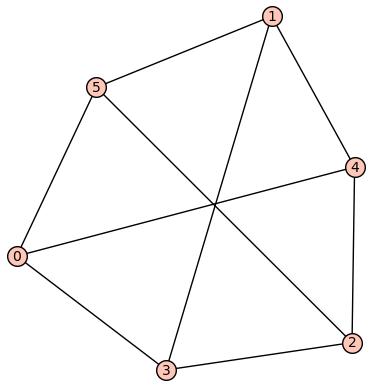

In [62]:
# test za Petersena in K_3_3 (potem verjetno prav dela)
petersen = solutions_i3[10][0]
petersen.show()
K_3_3 = solutions_i3[6][0]
K_3_3.show()

In [48]:
# r = 5
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_i5 = {}
r = 5

for n in range(6, 17, 2):
    print(f"\nIščem grafe za (i): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_i(G):
            sols.append(G)

    solutions_i5[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (i): {len(sols)}")


Iščem grafe za (i): n = 6
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 8
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 10
  preverjenih grafov: 1
  najdenih rešitev za (i): 1

Iščem grafe za (i): n = 12
  preverjenih grafov: 1
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 14
  preverjenih grafov: 7
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 16


  preverjenih grafov: 388
  najdenih rešitev za (i): 0


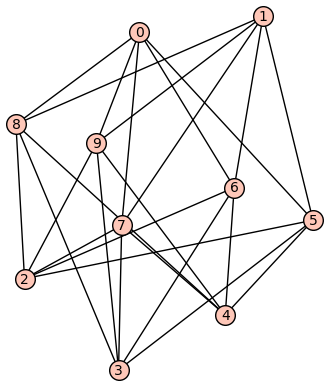

In [55]:
K_5_5 = solutions_i5[10][0]
K_5_5.show()

In [51]:
# r = 7
from sage.graphs.graph_generators import GraphGenerators
graphs_gen = GraphGenerators()

solutions_i7 = {}
r = 7

for n in range(8, 19, 2):
    print(f"\nIščem grafe za (i): n = {n}")

    sols = []
    checked = 0

    for G in graphs_gen.nauty_geng(f"{n} -d{r} -D{r} -t"):
        checked += 1

        if not G.is_connected():
            continue

        if satisfies_i(G):
            sols.append(G)

    solutions_i7[n] = sols

    print(f"  preverjenih grafov: {checked}")
    print(f"  najdenih rešitev za (i): {len(sols)}")


Iščem grafe za (i): n = 8
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 10
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 12
  preverjenih grafov: 0
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 14
  preverjenih grafov: 1
  najdenih rešitev za (i): 1

Iščem grafe za (i): n = 16
  preverjenih grafov: 1
  najdenih rešitev za (i): 0

Iščem grafe za (i): n = 18


  preverjenih grafov: 8
  najdenih rešitev za (i): 0


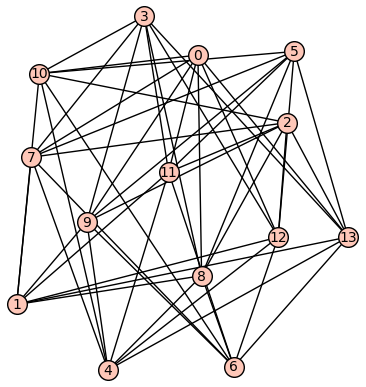

In [52]:
K_7_7 = solutions_i7[14][0]
K_7_7.show()